## Import Libraries

In [1]:
import os
import math
import numpy as np
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

## Variables

In [9]:
model_output_size = len(os.listdir('UCF101'))
image_height = 64
image_width = 64



## Load Features and Labels

In [3]:
features = np.load('features.npy')
labels = np.load('labels.npy')

In [4]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

## Split Data

In [5]:
features_train, features_test, labels_train, labels_test = train_test_split(features,
one_hot_encoded_labels, test_size = 0.2, shuffle = True, random_state = 17)

## Construct Model

In [10]:
# Let's create a function that will construct our model
def create_model():

    # We will use a Sequential model for model construction
    model = Sequential()

    # Defining The Model Architecture
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(model_output_size, activation = 'softmax'))

    # Printing the models summary
    model.summary()

    return model


# Calling the create_model method
model = create_model()

print("Model Created Successfully!")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)              

## Model Structure

In [11]:
plot_model(model, to_file = 'model_structure_plot.png', show_shapes = True, show_layer_names = True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


## Train

In [12]:
# Adding Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

# Adding loss, optimizer and metrics values to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start Training
model_training_history = model.fit(x = features_train, y = labels_train, 
epochs = 40, batch_size = 16 , shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/40
2664/2664 [==============================] - 484s 181ms/step - loss: 3.3138 - accuracy: 0.2058 - val_loss: 3.6896 - val_accuracy: 0.2042
Epoch 2/40
2664/2664 [==============================] - 442s 166ms/step - loss: 2.2257 - accuracy: 0.4181 - val_loss: 2.1910 - val_accuracy: 0.4230
Epoch 3/40
2664/2664 [==============================] - 435s 163ms/step - loss: 1.6717 - accuracy: 0.5484 - val_loss: 1.5559 - val_accuracy: 0.5885
Epoch 4/40
2664/2664 [==============================] - 428s 160ms/step - loss: 1.3235 - accuracy: 0.6383 - val_loss: 1.9880 - val_accuracy: 0.4882
Epoch 5/40
2664/2664 [==============================] - 432s 162ms/step - loss: 1.1120 - accuracy: 0.6908 - val_loss: 1.3049 - val_accuracy: 0.6462
Epoch 6/40
2664/2664 [==============================] - 428s 161ms/step - loss: 0.9734 - accuracy: 0.7273 - val_loss: 1.1508 - val_accuracy: 0.6869
Epoch 7/40
2664/2664 [==============================] - 431s 162ms/step - loss: 0.8740 - accuracy: 0.7513 - val_

### Model evaluation History

In [13]:
model_evaluation_history = model.evaluate(features_test, labels_test)

417/417 [==============================] - 27s 61ms/step - loss: 0.5103 - accuracy: 0.8626


### Save Model

In [14]:
# Creating a useful name for our model, incase you're saving multiple models (OPTIONAL)
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
model_name = f'101Model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Saving your Model
model.save(model_name)

### Plot

In [15]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
  metric_value_1 = model_training_history.history[metric_name_1]
  metric_value_2 = model_training_history.history[metric_name_2]

  # Constructing a range object which will be used as time 
  epochs = range(len(metric_value_1))
  
  # Plotting the Graph
  plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
  plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
  
  # Adding title to the plot
  plt.title(str(plot_name))

  # Adding legend to the plot
  plt.legend()

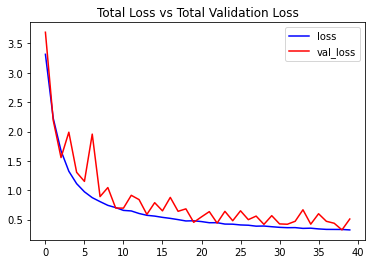

In [16]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

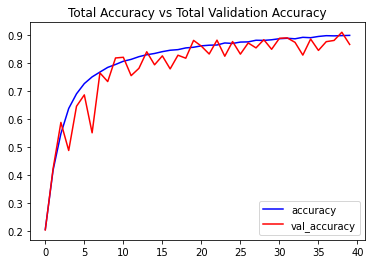

In [17]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')